<a href="https://colab.research.google.com/github/ranjitben10/Rag_examples/blob/main/Chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install langgraph langsmith

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 906.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.2/290.2 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.9/399.9 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 378.0/378.0 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.9 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0
  Attempting uninstall: msgpack
    Found existing installation: msgpack 1.0.8
    Uninstalling msgpack-1.0.8:
      Succe

In [2]:
!pip install langchain_community langchain_groq langchain

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 47.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.5/106.5 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 3.4 MB/s eta 0:00:00


In [3]:
import os

In [4]:
groq_api_key = "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"

In [5]:
LANGSMITH_API_KEY = "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"

In [6]:
import os
os.environ["LANGCHAIN_API_KEY"] = LANGSMITH_API_KEY
os.environ["LANGCHAIN_TRACING_V2"]="true"
os.environ["LANGCHAIN_PROJECT"]="Course_Langgraph"

In [7]:
from langchain_groq import ChatGroq

In [8]:
llm = ChatGroq(groq_api_key = groq_api_key, model_name = "Gemma2-9b-It")

In [9]:
from typing import Annotated
from typing_extensions import TypedDict

In [10]:
from langgraph.graph import START,StateGraph,END

In [11]:
from langgraph.graph.message import add_messages

In [12]:
class State(TypedDict):
  messages:Annotated[list,add_messages]

graph_builder = StateGraph(State)

In [13]:
def chatbot(state:State):
  return {"messages":llm.invoke(state['messages'])}

In [14]:
graph_builder.add_node('chatbot',chatbot)

In [15]:
graph_builder.add_edge(START,'chatbot')
graph_builder.add_edge('chatbot',END)

In [16]:
app = graph_builder.compile()

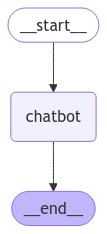

In [17]:
from IPython.display import Image, display

try:
    display(Image(app.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [26]:
from pprint import pprint
while True:
  user_input = input("user:")
  if user_input.lower() in ['q','b']:
    break
  # Run
  inputs = {
      "messages": f"{user_input}"
  }
  for output in app.stream(inputs):
      for key, value in output.items():
          # Node
          # pprint(f"Node '{key}':")
          # pprint(f"Value '{value}' ")
          pprint(value['messages'].dict()['content'])
      pprint("\n---\n")


user:hi
'Hello! 👋 How can I help you today? 😊  \n'
'\n---\n'
user:q
